In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

##### first query

In [4]:
df1 = pd.read_csv('/datasets/query_1.csv')
df1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [13]:
df1.model.value_counts()

Airbus A319-100        1
Cessna 208 Caravan     1
Boeing 767-300         1
Sukhoi SuperJet-100    1
Bombardier CRJ-200     1
Boeing 777-300         1
Airbus A321-200        1
Boeing 737-300         1
Name: model, dtype: int64

Text(0.5, 1.0, 'Количество рейсов для каждой модели самолетов')

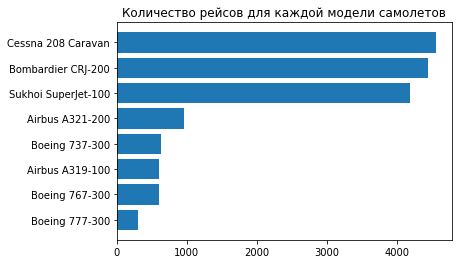

In [46]:
df1 = df1.sort_values(by = 'flights_amount')
fig, ax = plt.subplots() 
ax.barh(df1.model, df1.flights_amount)
plt.title('Количество рейсов для каждой модели самолетов')

##### third query 

In [5]:
df3 = pd.read_csv('/datasets/query_3.csv')
df3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [17]:
df3.city.duplicated().sum()

0

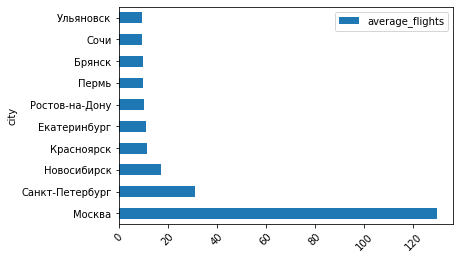

In [86]:
df3_top = df3.sort_values(by = 'average_flights', ascending = False).head(10)
df3_top.plot('city', 'average_flights', kind = 'barh')

plt.title = 'Среднее количество рейсов, прибывающих в город за день в сентябре 2018'
plt.xlabel = 'average_flights'
plt.xlabel = 'city'
plt.xticks(rotation = 45)

plt.show()

##### last query

In [6]:
df_last = pd.read_csv('/datasets/query_last.csv')
df_last.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [20]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


 - Отсутствие значения в festival_week и festival_name - видимо и не было никакого фестиваля
 - festival_week должно быть int

In [27]:
df_last.festival_week = [int(item) for item in df_last.festival_week.fillna(0)]
df_last.festival_name = df_last.festival_name.fillna('No_one')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    10 non-null int64
festival_name    10 non-null object
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


#### Проверка гипотезы

##### H0 - Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
##### H1 - Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

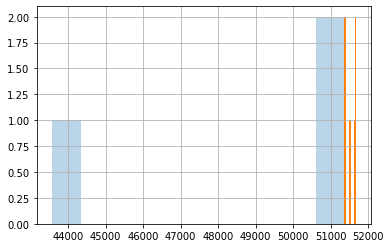

In [103]:
no_fests = df_last.query('festival_name == "No_one"')['ticket_amount']
fests = df_last.query('festival_name != "No_one"')['ticket_amount']

fests.hist(alpha = 0.3)
no_fests.hist(alpha = 1)

In [107]:
alpha = 0.05

results = st.ttest_ind(
    no_fests, 
    fests, equal_var = False) #проверка гипотезы о равенстве средних двух независимых совокупностей

print('p-значение: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу:")
    print("          Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время")

p-значение:  0.377432493172683
Не получилось отвергнуть нулевую гипотезу:
          Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время
